In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Carregando os dados
df = pd.read_csv('versao_3_spotify_songs.csv')

O código emprega o algoritmo DBSCAN para identificar grupos em um conjunto de dados com base na densidade de pontos em um espaço definido pelas características das músicas. Ele realiza testes variando épsilon (raio de vizinhança) e min_samples (número mínimo de amostras em uma vizinhança) no DBSCAN.

Após a aplicação do algoritmo com diferentes parâmetros, é gerado um gráfico de dispersão, onde cada ponto representa uma música e é colorido conforme o cluster atribuído pelo DBSCAN. Isso permite explorar a organização natural das músicas e identificar agrupamentos com características semelhantes.

O objetivo é compreender como as músicas se agrupam naturalmente, destacando padrões e possíveis estilos musicais presentes no conjunto de dados. A variação dos parâmetros do DBSCAN oferece uma análise mais aprofundada da estrutura dos dados, facilitando insights sobre os agrupamentos identificados.

Para épsilon=0.1 e min_samples=5, o DBSCAN encontrou 38 clusters diferentes nos dados.


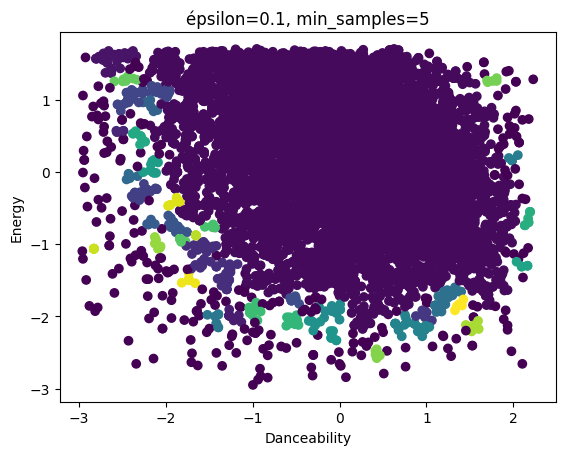

Para épsilon=0.1 e min_samples=10, o DBSCAN encontrou 29 clusters diferentes nos dados.


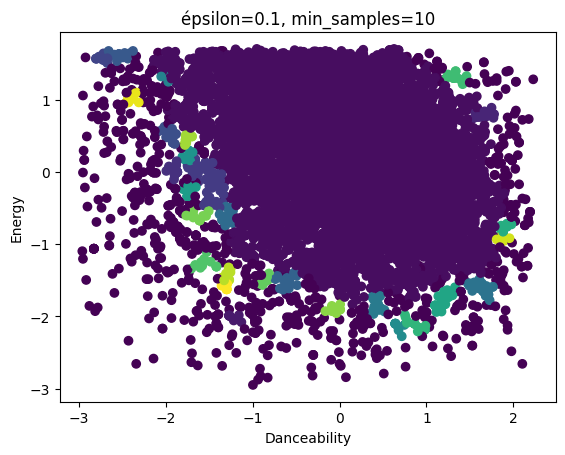

Para épsilon=0.1 e min_samples=15, o DBSCAN encontrou 12 clusters diferentes nos dados.


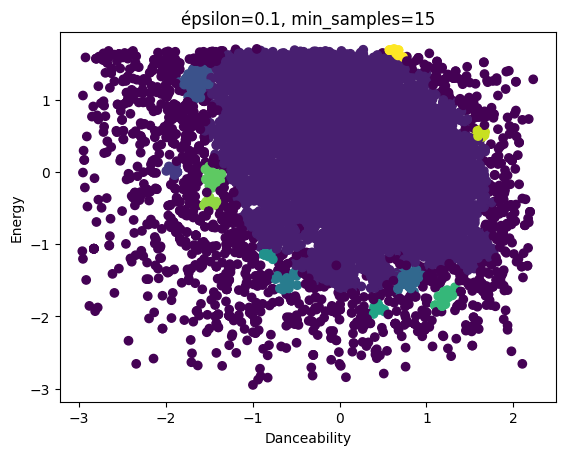

Para épsilon=0.5 e min_samples=5, o DBSCAN encontrou 1 clusters diferentes nos dados.


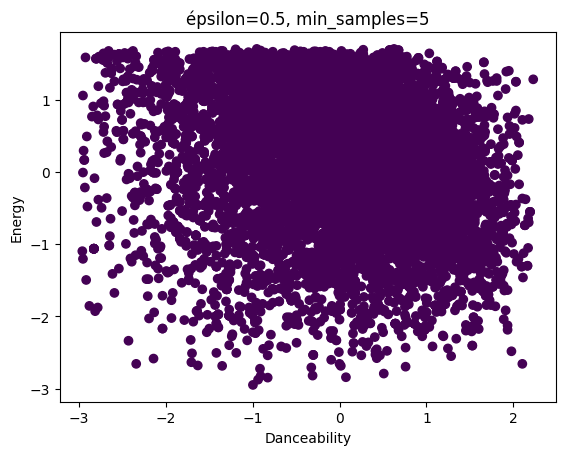

Para épsilon=0.5 e min_samples=10, o DBSCAN encontrou 1 clusters diferentes nos dados.


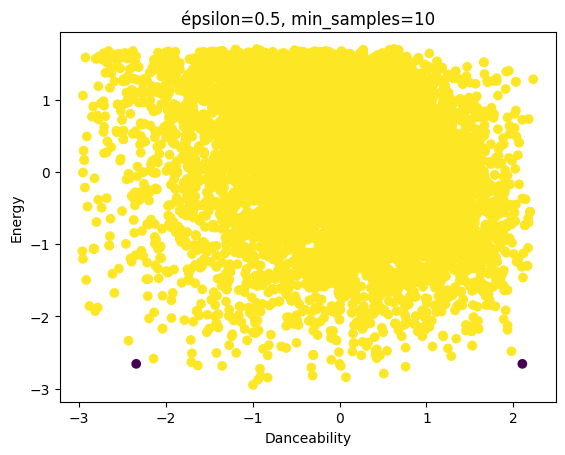

Para épsilon=0.5 e min_samples=15, o DBSCAN encontrou 1 clusters diferentes nos dados.


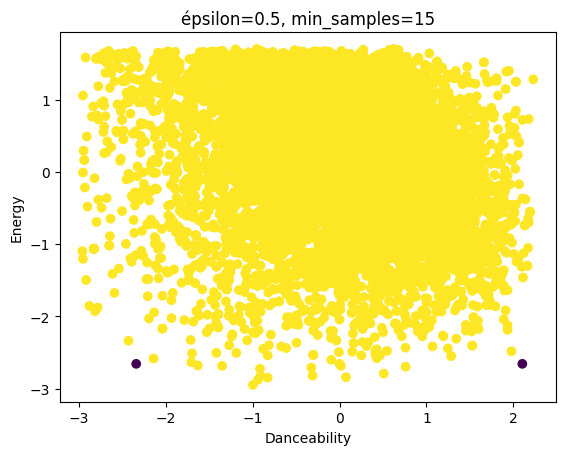

Para épsilon=1.0 e min_samples=5, o DBSCAN encontrou 1 clusters diferentes nos dados.


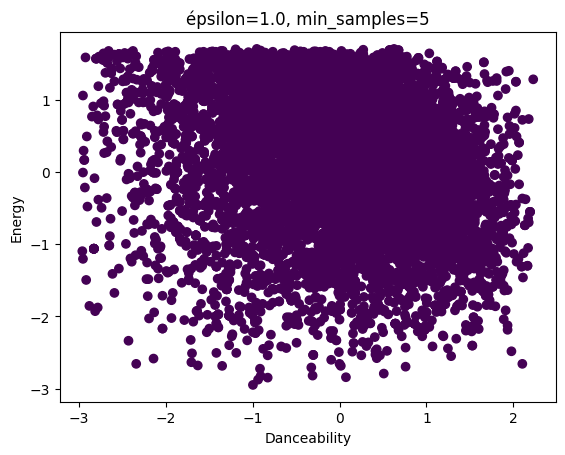

Para épsilon=1.0 e min_samples=10, o DBSCAN encontrou 1 clusters diferentes nos dados.


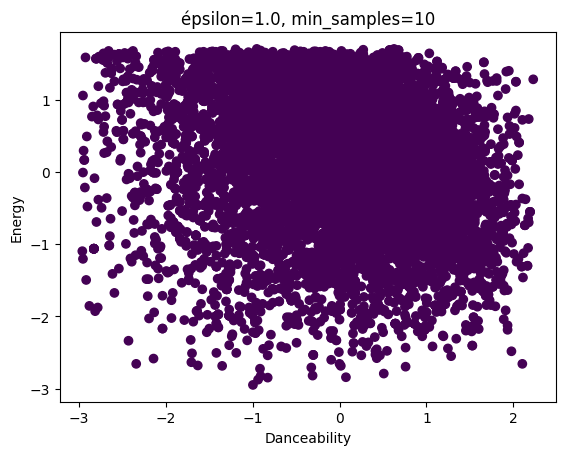

Para épsilon=1.0 e min_samples=15, o DBSCAN encontrou 1 clusters diferentes nos dados.


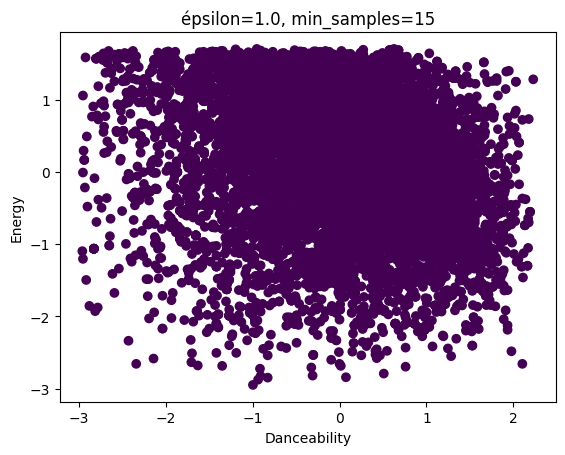

In [3]:
# Definindo os valores de épsilon e min_samples a serem testados
valores_epsilon = [0.1, 0.5, 1.0]
valores_min_samples = [5, 10, 15]

# Loop para testar diferentes combinações de épsilon e min_samples
for epsilon in valores_epsilon:
    for min_samples in valores_min_samples:
        # Criando o objeto DBSCAN
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

        # Aplicando o algoritmo nos dados específicos do seu conjunto
        rotulos = dbscan.fit_predict(df[["danceability", "energy"]])  # Altere para suas características de interesse

        # Contando os rótulos identificados
        num_clusters = len(set(rotulos)) - (1 if -1 in rotulos else 0)
        print(f"Para épsilon={epsilon} e min_samples={min_samples}, o DBSCAN encontrou {num_clusters} clusters diferentes nos dados.")

        # Visualizando os resultados
        plt.scatter(df["danceability"], df["energy"], c=rotulos)
        plt.xlabel("Danceability")  # Altere para sua característica de interesse
        plt.ylabel("Energy")  # Altere para sua característica de interesse
        plt.title(f"épsilon={epsilon}, min_samples={min_samples}")
        plt.show()


In [4]:
num_clusters = len(set(rotulos)) - (1 if -1 in rotulos else 0)
print(f"Foram detectados {num_clusters} clusters.")


Foram detectados 1 clusters.


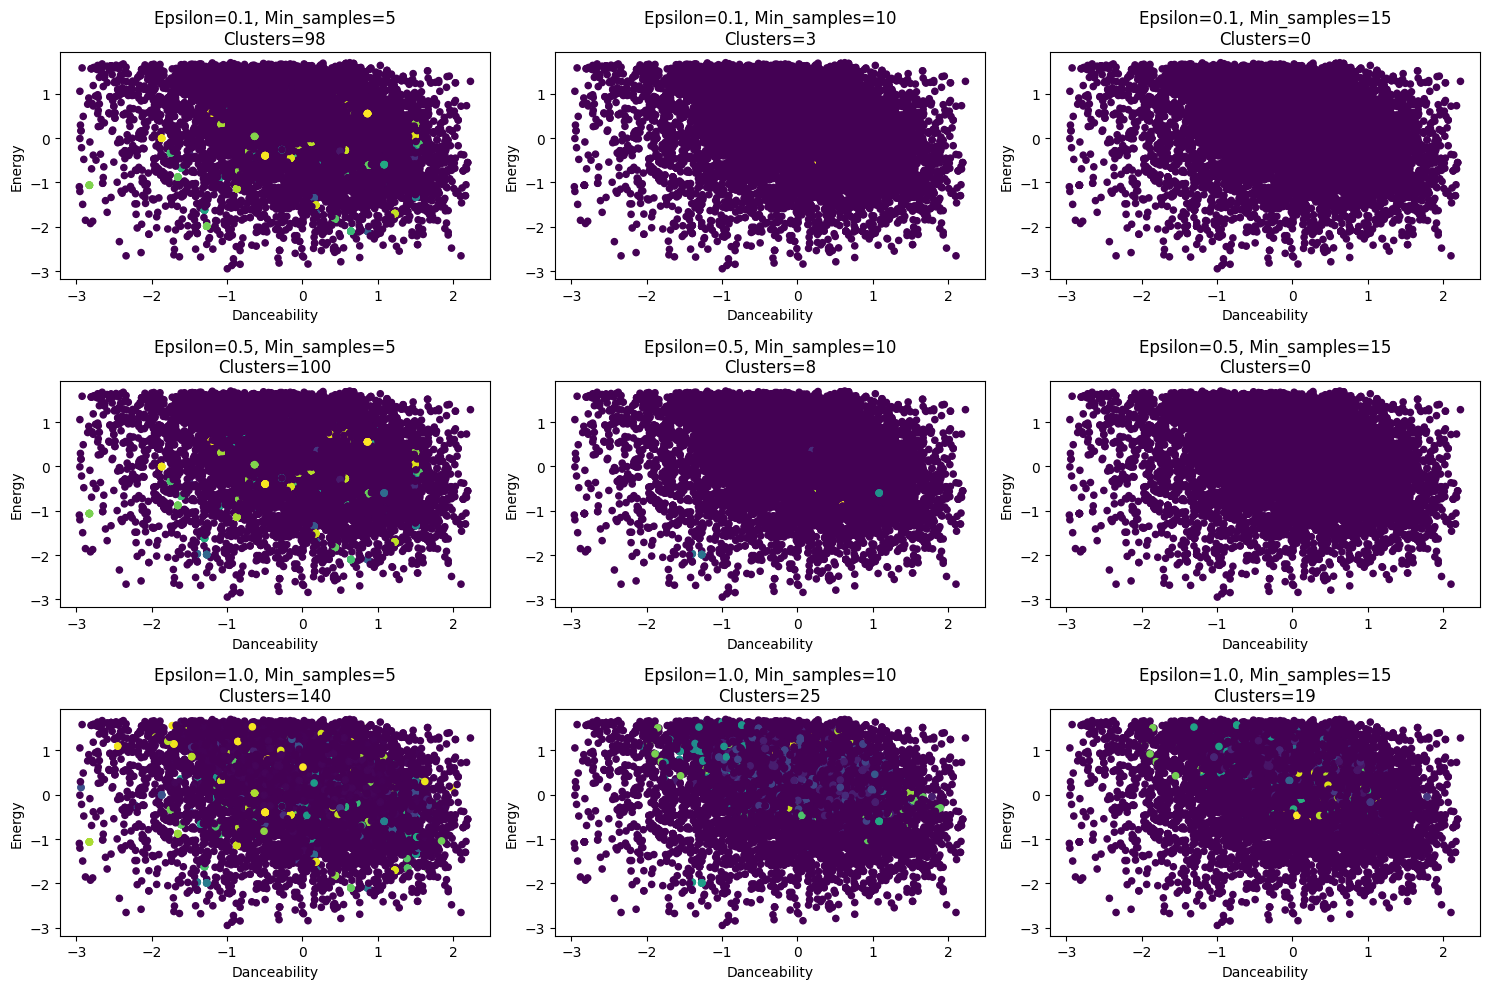

In [5]:
# Seleção das características para o clustering
caracteristicas = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]

# Selecione os dados relevantes do seu dataset
data = df[caracteristicas]

# Normalização dos dados
data_normalized = (data - data.mean()) / data.std()

# Defina os valores para épsilon e min_samples a serem testados
valores_epsilon = [0.1, 0.5, 1.0]
valores_min_samples = [5, 10, 15]

fig, axs = plt.subplots(
    len(valores_epsilon), len(valores_min_samples), figsize=(15, 10)
)

for i, epsilon in enumerate(valores_epsilon):
    for j, min_samples in enumerate(valores_min_samples):
        # Cria o objeto DBSCAN
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

        # Aplica o algoritmo nos dados normalizados
        rotulos = dbscan.fit_predict(data_normalized)

        # Conta os rótulos identificados
        num_clusters = len(set(rotulos)) - (1 if -1 in rotulos else 0)

        # Visualização dos resultados
        axs[i, j].scatter(
            data["danceability"], data["energy"], c=rotulos, cmap="viridis", s=20
        )
        axs[i, j].set_title(
            f"Epsilon={epsilon}, Min_samples={min_samples}\nClusters={num_clusters}"
        )
        axs[i, j].set_xlabel("Danceability")
        axs[i, j].set_ylabel("Energy")

plt.tight_layout()
plt.show()

Explorando Clusters com DBSCAN

Seleção de Características Relevantes

Escolhemos características importantes do conjunto de dados.
Extração e Normalização dos Dados

Selecionamos e normalizamos as características para preparar os dados para o algoritmo.
Testando Diferentes Configurações do DBSCAN

Variamos os valores de epsilon e min_samples para ver como afetam a detecção de clusters.
Visualizando os Resultados

Criamos gráficos para ver como as músicas estão agrupadas com base nas características selecionadas.


In [6]:
num_clusters = len(set(rotulos)) - (1 if -1 in rotulos else 0)
print(f"Foram detectados {num_clusters} clusters.")


Foram detectados 19 clusters.


### Redução de Dimensionalidade 

/usr/lib/python3/dist-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


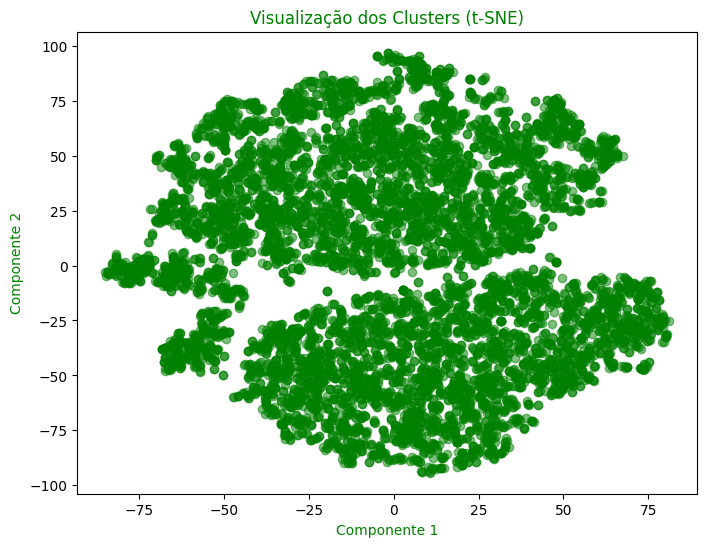

In [7]:
# Seleção de colunas numéricas
colunas_numericas = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]
dados_numericos = df[colunas_numericas]

# Redução de dimensionalidade com t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(dados_numericos)

# Visualização dos clusters com t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.5, c="green")
plt.title("Visualização dos Clusters (t-SNE)", color="green")
plt.xlabel("Componente 1", color="green")
plt.ylabel("Componente 2", color="green")
plt.show()

A associação das músicas aos clusters proporcionou uma visão detalhada das características predominantes em cada agrupamento, abrindo caminho para uma compreensão mais profunda dos padrões musicais no conjunto de dados do Spotify.

### Experimentação com Parâmetros do DBSCAN:

A função `experimento()` testa diferentes valores de `eps` e `min_samples` do DBSCAN em dados transformados pelo t-SNE. O objetivo é entender como a variação desses parâmetros afeta a identificação de clusters. O gráfico resultante, um mapa de calor, mostra visualmente o número de clusters para cada combinação de parâmetros. Isso ajuda na escolha dos valores ideais para revelar agrupamentos significativos nos dados musicais após a redução de dimensionalidade.



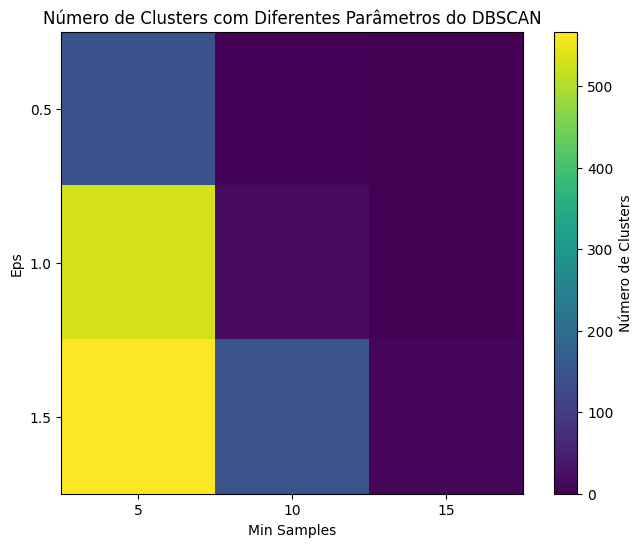

In [8]:
# Função para experimentar parâmetros do DBSCAN
def experimento(eps_values, min_samples_values, dados):
    resultados = {}

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(dados)
            n_clusters = len(np.unique(labels)) - 1  # Ignora o rótulo -1 (outliers)
            resultados[(eps, min_samples)] = n_clusters

    # Mapa de calor para os resultados
    n_clusters_array = np.zeros((len(eps_values), len(min_samples_values)))
    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            n_clusters_array[i, j] = resultados[(eps, min_samples)]

    plt.figure(figsize=(8, 6))
    plt.imshow(n_clusters_array, cmap="viridis", interpolation="nearest")
    plt.colorbar(label="Número de Clusters")
    plt.xticks(np.arange(len(min_samples_values)), min_samples_values)
    plt.yticks(np.arange(len(eps_values)), eps_values)
    plt.xlabel("Min Samples")
    plt.ylabel("Eps")
    plt.title("Número de Clusters com Diferentes Parâmetros do DBSCAN")
    plt.show()

# Valores para experimentação do DBSCAN
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

# Chamada da função de experimentação
experimento(eps_values, min_samples_values, df_tsne)


## Otimizando Parâmetros do DBSCAN com o Índice de Silhueta

Este código itera por diferentes valores de `eps` e `min_samples` no DBSCAN para encontrar a configuração que resulte nos clusters mais distintos e coesos. Durante o processo, calcula o índice de silhueta, uma medida de quão bem os clusters estão definidos, buscando valores próximos de 1 para indicar clusters bem separados.

Ao final, identifica e registra a melhor combinação de `eps` e `min_samples` com o maior índice de silhueta. Esse processo visa encontrar os parâmetros ideais que criam clusters mais consistentes e significativos nos dados musicais após a redução de dimensionalidade pelo t-SNE.


Ou seja, o objetivo do código é encontrar os valores de `eps` e `min_samples` que resultem nos clusters mais definidos e separados, utilizando o índice de silhueta como métrica de avaliação.

In [9]:
# Ajuste o DBSCAN com diferentes valores de eps e min_samples
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

best_silhouette_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_tsne)  # Use os dados transformados pelo t-SNE
        if len(np.unique(labels)) > 1:  # Verifique se mais de um cluster foi identificado
            silhouette_avg = silhouette_score(df_tsne, labels)
            print(f"For eps={eps}, min_samples={min_samples}, silhouette score: {silhouette_avg}")
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

print(f"Best silhouette score: {best_silhouette_score} with eps={best_eps} and min_samples={best_min_samples}")


For eps=0.5, min_samples=5, silhouette score: -0.7218283414840698
For eps=0.5, min_samples=10, silhouette score: -0.5611693263053894
For eps=1.0, min_samples=5, silhouette score: -0.26255282759666443
For eps=1.0, min_samples=10, silhouette score: -0.7141450047492981
For eps=1.5, min_samples=5, silhouette score: 0.16923853754997253
For eps=1.5, min_samples=10, silhouette score: -0.5394435524940491
For eps=1.5, min_samples=15, silhouette score: -0.614709734916687
Best silhouette score: 0.16923853754997253 with eps=1.5 and min_samples=5


**Análise Estatística por Cluster**

Este código associa os clusters identificados pelo DBSCAN às músicas no DataFrame original. Em seguida, calcula as médias e desvios-padrão de cada característica musical para cada cluster. Essas estatísticas oferecem uma visão das tendências e variações das características em cada grupo identificado pelo algoritmo de clustering.

O código agrega os dados por cluster e fornece uma análise estatística das características musicais em cada grupo identificado.

In [10]:
# Adicionar os rótulos ao DataFrame original
df['cluster'] = labels

# Calcular médias e desvios-padrão de cada atributo por cluster
descritivas_por_cluster = df.groupby('cluster').agg(['mean', 'std'])
print(descritivas_por_cluster)

        track_popularity           danceability              energy            \
                    mean       std         mean       std      mean       std   
cluster                                                                         
-1              0.018102  0.988746     0.026677  0.969898  0.058220  0.912562   
 0              0.725807  1.213986    -1.474503  0.357516  0.686187  0.413255   
 1              1.148693  0.878144     1.270672  0.154416 -0.836745  0.163476   
 2              1.012009  0.957575     0.776456  0.266323 -0.152760  0.166203   
 3              1.577442  0.963392     0.591940  0.051612 -0.810402  0.097854   
 4              0.561372  0.667882     0.467136  0.186762  0.792271  0.184478   
 5              0.914812  1.152610     0.549635  0.303993 -0.839199  0.283124   
 6              0.040909  1.291214     0.312528  0.309583 -1.673942  0.268396   
 7              1.475006  0.939962     0.684422  0.241951  0.611129  0.077526   

              key          

## Gráfico de Boxplot para Clusters Musicais

Este gráfico mostra como as características das músicas (como energia, danceabilidade, etc.) variam entre os diferentes grupos identificados pelo algoritmo de clustering. As caixas representam a variação dos valores em cada grupo.

O que observamos:
- **Tendência Central:** A linha no meio de cada caixa mostra a mediana das características em cada grupo.
- **Variação e Valores Únicos:** A extensão das caixas e dos "bigodes" indica o alcance dos dados. Pontos fora dos bigodes são valores únicos em cada grupo.
- **Diferenças entre Grupos:** Buscamos por caixas distintas ou grupos com características notavelmente diferentes em algum aspecto.

Essa análise nos ajuda a identificar padrões e diferenças nas características musicais entre os clusters, possibilitando uma compreensão mais clara dos estilos ou padrões presentes nos diferentes grupos musicais identificados.

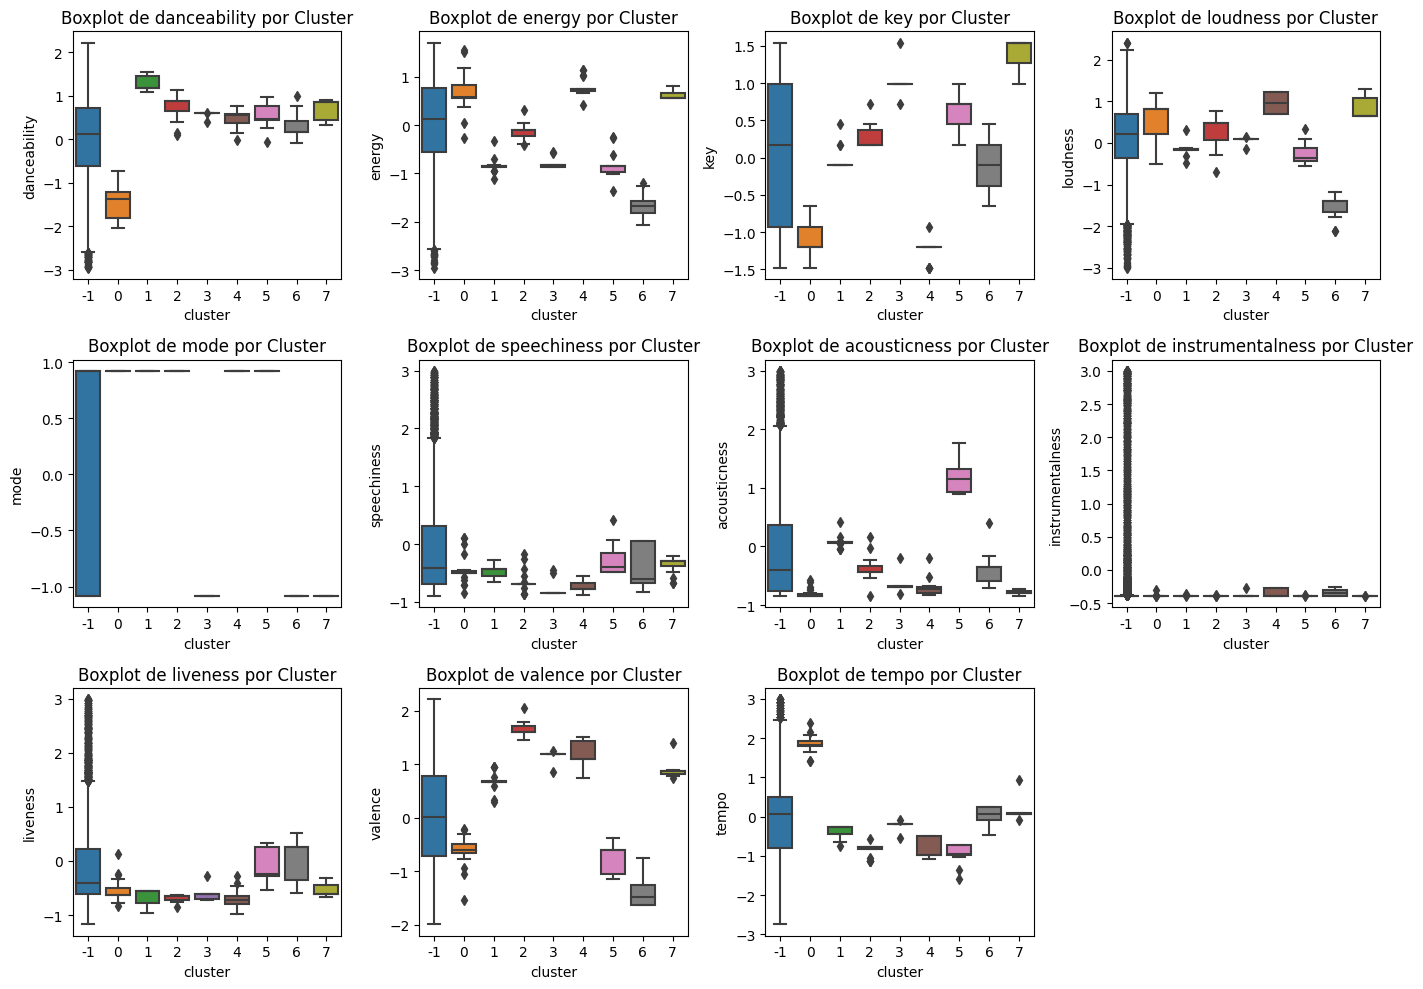

In [11]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(colunas_numericas, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(f'Boxplot de {col} por Cluster')
plt.tight_layout()
plt.show()



**Visualização da Associação Música-Cluster**

Esse código cria um gráfico de dispersão que ilustra visualmente como as músicas estão distribuídas entre os clusters identificados. Primeiro, é adicionado um número único para cada música.

O gráfico de dispersão mostra cada música no eixo x, identificada pelo seu índice numérico, e o cluster correspondente no eixo y. Cada ponto no gráfico representa uma música e seu respectivo cluster, oferecendo uma visão clara da associação das músicas aos clusters.

In [12]:
# Adicionando um índice numérico às músicas
df['music_id'] = range(len(df))

# Criar um novo DataFrame com o índice numérico e os clusters
musicas_por_cluster = df[['music_id', 'cluster']]
print(musicas_por_cluster)
# Isso mostrará a associação de cada música (através do índice numérico) ao seu cluster correspondente


      music_id  cluster
0            0       -1
1            1       -1
2            2       -1
3            3       -1
4            4       -1
...        ...      ...
8752      8752       -1
8753      8753       -1
8754      8754       -1
8755      8755       -1
8756      8756       -1

[8757 rows x 2 columns]


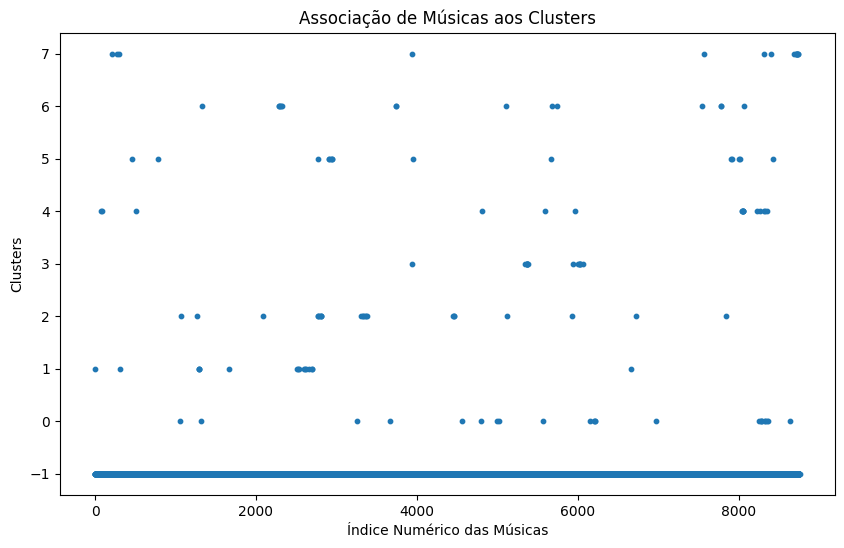

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(musicas_por_cluster['music_id'], musicas_por_cluster['cluster'], s=10)
plt.title('Associação de Músicas aos Clusters')
plt.xlabel('Índice Numérico das Músicas')
plt.ylabel('Clusters')
plt.show()


In [14]:
num_clusters = len(set(rotulos)) - (1 if -1 in rotulos else 0)
print(f"Foram detectados {num_clusters} clusters.")

Foram detectados 19 clusters.


Esse código é como um investigador de estilos musicais. Ele analisa um monte de músicas e as coloca em grupos, como se fossem clubes. Depois, olha as características principais de cada clube musical, como o quanto são animadas, energéticas ou instrumentais. Com gráficos de barras, mostra essas diferenças entre os clubes, ajudando a entender quais características se destacam em cada tipo de música. É como descobrir os estilos musicais secretos escondidos nos grupos que o algoritmo achou.



        danceability              energy                 key            \
                mean       std      mean       std      mean       std   
cluster                                                                  
-1          0.019476  0.992387  0.019775  0.926443 -0.022381  1.004964   
 0          0.105265  0.546607  0.526330  0.578199  1.009264  0.499672   
 1          0.250334  0.504369  0.571967  0.393189  0.541676  0.472371   
 2          1.128629  0.356040 -0.130576  0.206912  0.855567  0.357101   
 3          0.319638  0.243754  1.004905  0.132256 -0.255536  0.143434   
 4          0.489251  0.203509  0.706870  0.259361 -1.259273  0.143685   
 5          0.285052  0.359083  1.061378  0.282675 -1.147796  0.276970   
 6         -0.008721  0.263220  0.667805  0.331401 -1.154405  0.276432   
 7         -0.123727  0.493296 -0.526607  0.200526 -1.082274  0.140434   
 8         -0.141026  0.281731  0.360557  0.193575 -1.478997  0.000000   
 9         -0.562974  0.377982  1.1072

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


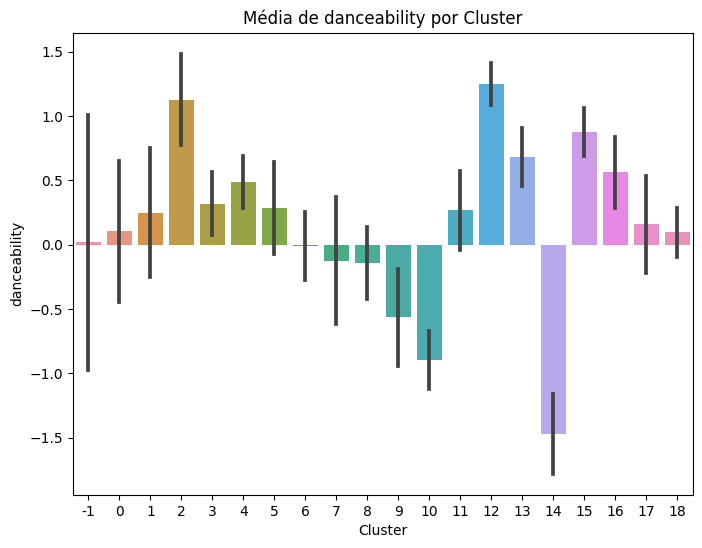

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


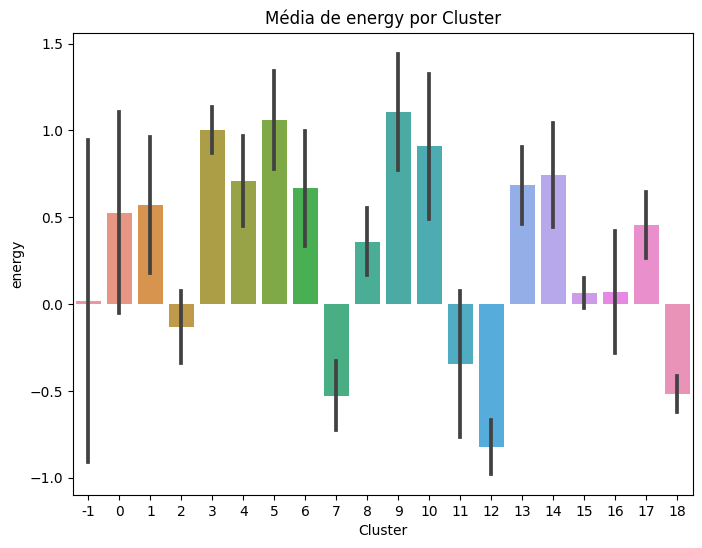

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


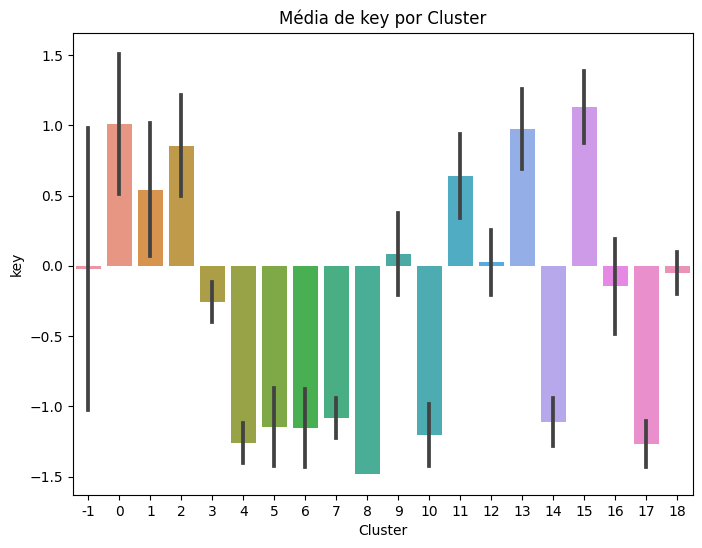

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


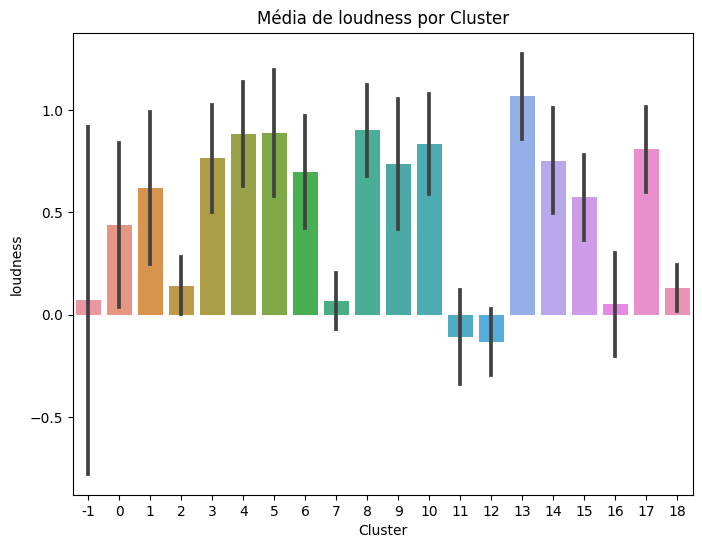

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


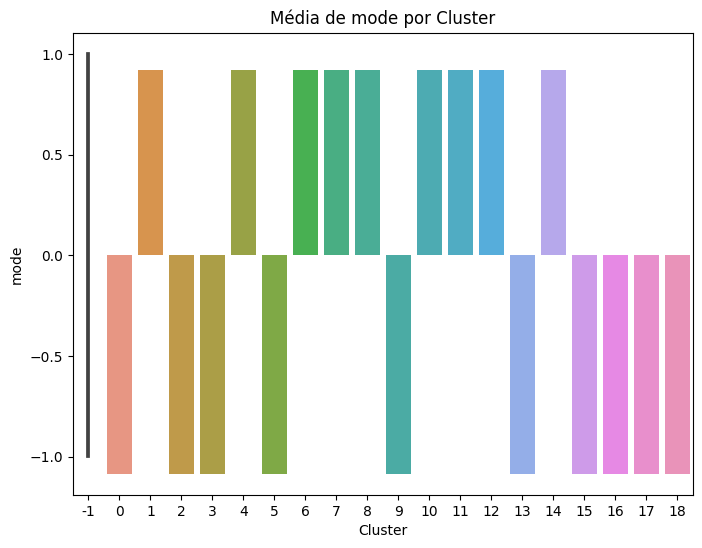

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


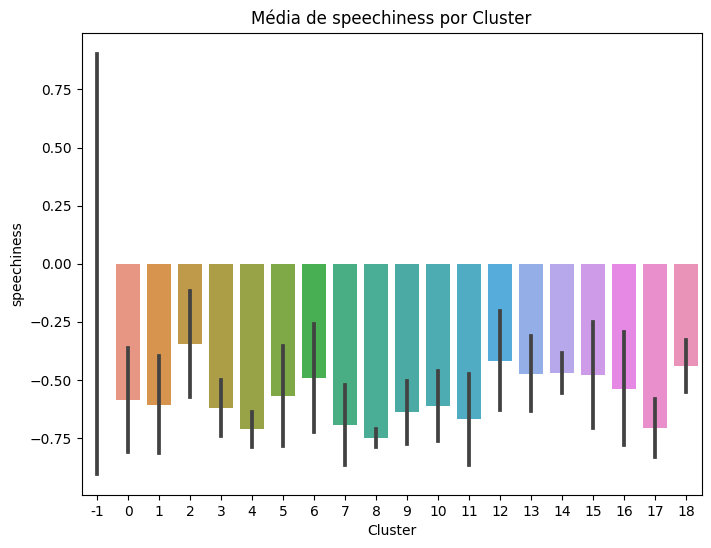

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


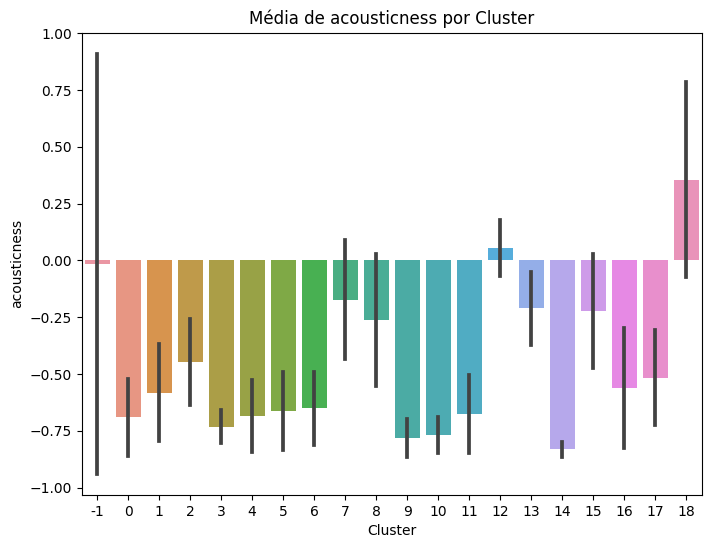

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


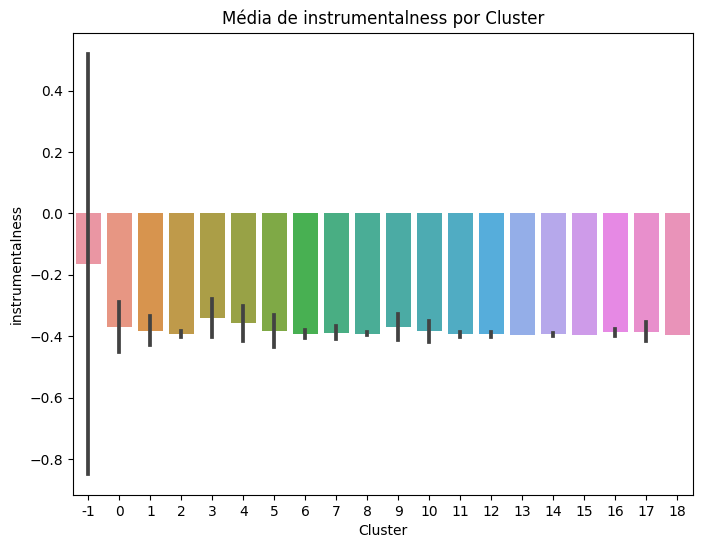

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


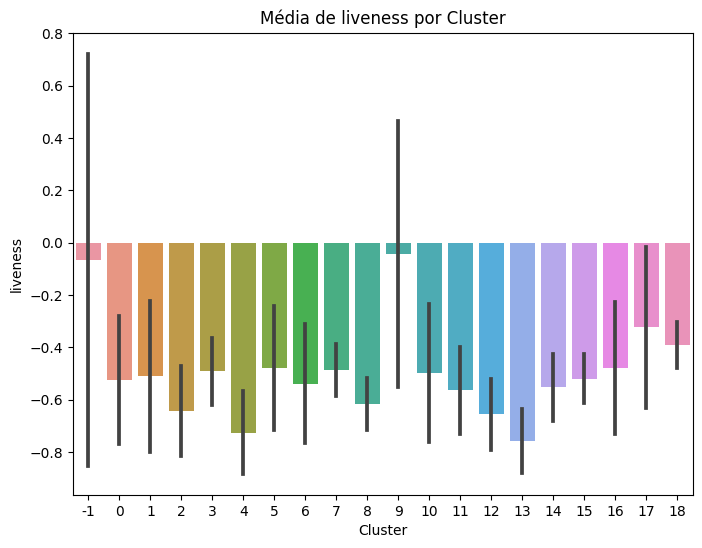

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


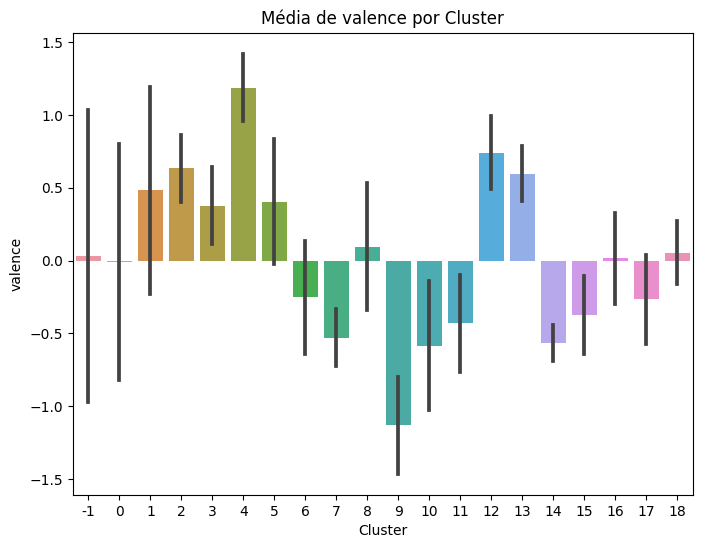

/tmp/ipykernel_44657/1228291974.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=col, data=df, ci='sd')


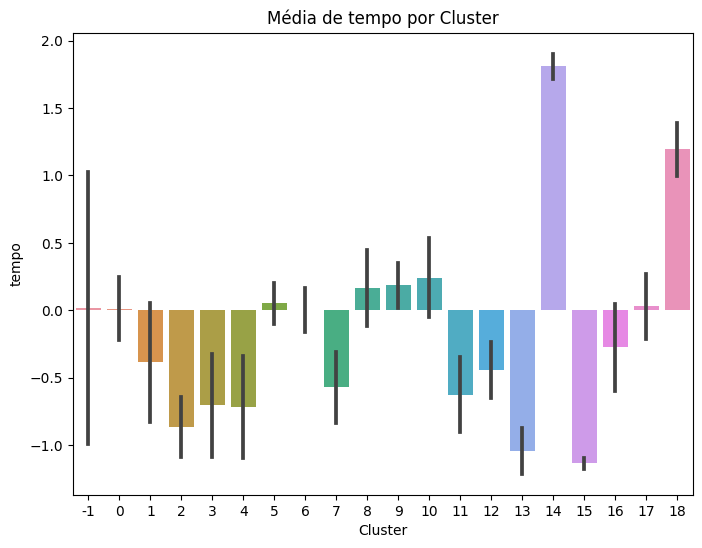

In [15]:
df['cluster'] = rotulos  # Substitua 'rotulos' pelos rótulos atribuídos pelo DBSCAN

# Estatísticas descritivas por cluster
descritivas_por_cluster = df.groupby('cluster')[colunas_numericas].agg(['mean', 'std'])
print(descritivas_por_cluster)

# Gráficos de barras para comparar as médias das características por cluster
for col in colunas_numericas:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='cluster', y=col, data=df, ci='sd')
    plt.title(f'Média de {col} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()


In [16]:
# Adicionando os rótulos de cluster ao DataFrame original
df['cluster'] = rotulos

# Dividindo os dados em features e target
X = df.drop(['cluster'], axis=1)  # Features
y = df['cluster']  # Target (rótulo de cluster)

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o modelo de Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com os dados
decision_tree.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = decision_tree.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia do modelo de Decision Tree: {accuracy:.2f}")


Acurácia do modelo de Decision Tree: 0.94


In [17]:
# Calcular o MSE (Erro Quadrático Médio)
mse = mean_squared_error(y_test, predictions)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

# Calcular o R² (Coeficiente de Determinação)
r2 = r2_score(y_test, predictions)
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Erro Quadrático Médio (MSE): 4.09
Coeficiente de Determinação (R²): 0.18


In [18]:
# Calcular a Acurácia
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy:.2f}")

# Calcular a Precisão
precision = precision_score(y_test, predictions, average='weighted')
print(f"Precisão: {precision:.2f}")

# Calcular o Recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall: {recall:.2f}")

# Calcular o F1-Score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1-Score: {f1:.2f}")


Acurácia: 0.94
Precisão: 0.95
Recall: 0.94
F1-Score: 0.94


/home/clara/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
